In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_values = np.array([[0], [1], [1], [0]])


In [3]:
class CustomNeuralNetwork(object):
    def __init__(self):
        input_layer_neurons = 2
        hidden_layer1_neurons = 10
        hidden_layer2_neurons = 10
        output_layer_neurons = 1

        self.learning_rate = 0.2
        self.weights_input_hidden1 = np.random.randn(input_layer_neurons, hidden_layer1_neurons)
        self.weights_hidden1_hidden2 = np.random.randn(hidden_layer1_neurons, hidden_layer2_neurons)
        self.weights_hidden2_output = np.random.randn(hidden_layer2_neurons, output_layer_neurons)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feed_forward(self, input_data):
        hidden1_input = np.dot(input_data, self.weights_input_hidden1)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.weights_hidden2_output)
        prediction = self.sigmoid(output_input)
        return prediction

    def backpropagation(self, input_data, target_values, prediction):
        output_error = target_values - prediction
        output_delta = output_error * self.sigmoid(prediction, derivative=True)

        hidden2_error = output_delta.dot(self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, derivative=True)

        hidden1_error = hidden2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, derivative=True)

        self.weights_hidden2_output += self.hidden2_output.T.dot(output_delta)
        self.weights_hidden1_hidden2 += self.hidden1_output.T.dot(hidden2_delta)
        self.weights_input_hidden1 += input_data.T.dot(hidden1_delta)

    def train(self, input_data, target_values):
        prediction = self.feed_forward(input_data)
        self.backpropagation(input_data, target_values, prediction)

In [4]:
customNN = CustomNeuralNetwork()

error_history = []

for i in range(10000):
    customNN.train(input_data, target_values)
    error = np.mean(np.square(target_values - customNN.feed_forward(input_data)))
    error_history.append(error)

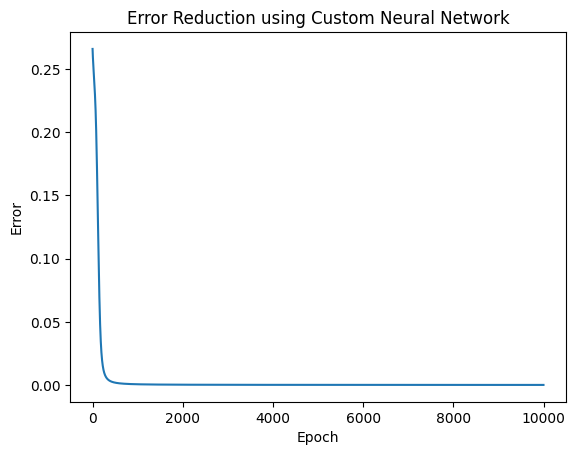

In [5]:
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Reduction using Custom Neural Network')
plt.show()